# Loading model, preprocessing and EDA

In [1]:
from transformers import AutoConfig, AutoTokenizer, AutoModel

config = AutoConfig.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
model = AutoModel.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")


In [2]:
import pandas as pd
train_data = pd.read_csv('./Train-word.csv', sep='\t')
val_data = pd.read_csv('./Val-word.csv', sep='\t')
test_data = pd.read_csv('./Test-word.csv', sep='\t')

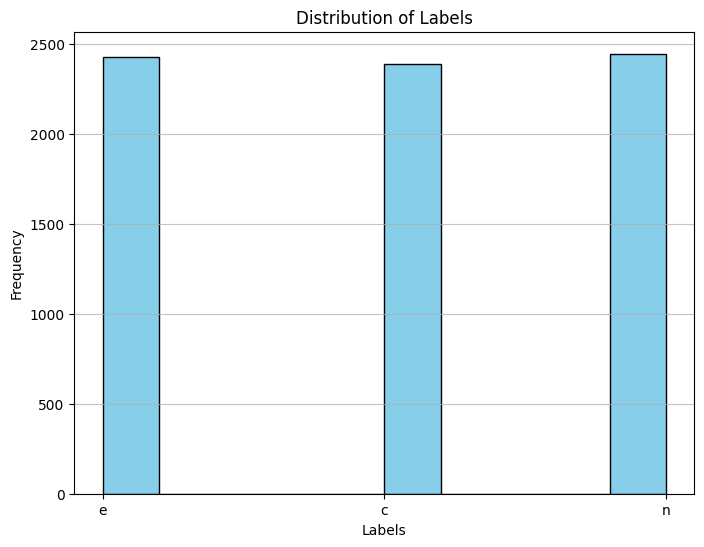

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6)) 
plt.hist(train_data['label'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Labels')  
plt.ylabel('Frequency')  
plt.grid(axis='y', alpha=0.75) 
plt.show()  


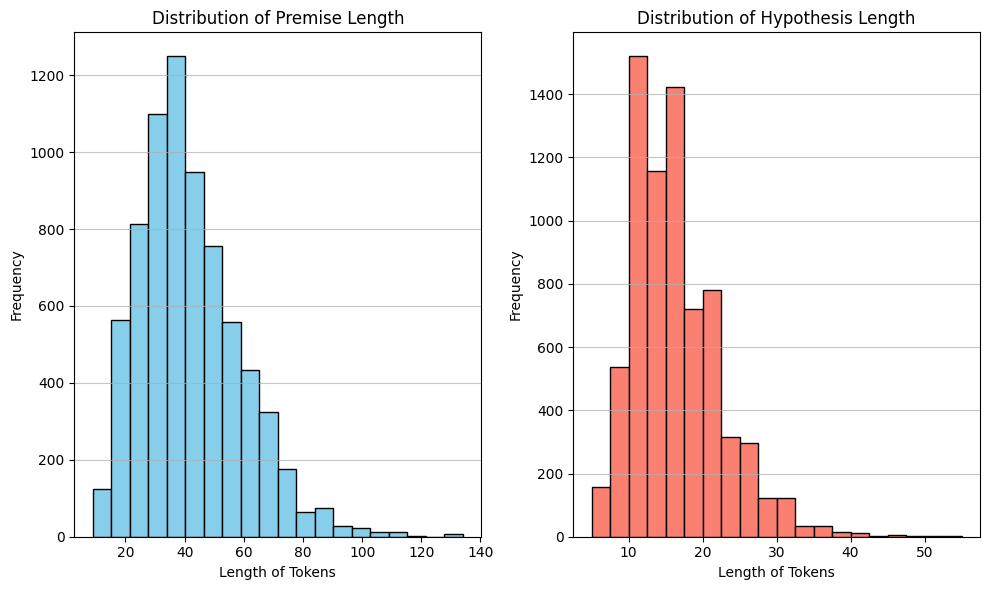

In [4]:
import matplotlib.pyplot as plt
premise_lengths = train_data['premise'].apply(lambda x: len(tokenizer.tokenize(x)))
hypothesis_lengths = train_data['hypothesis'].apply(lambda x: len(tokenizer.tokenize(x)))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(premise_lengths, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Premise Length')
plt.xlabel('Length of Tokens')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.subplot(1, 2, 2)
plt.hist(hypothesis_lengths, bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Hypothesis Length')
plt.xlabel('Length of Tokens')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

In [5]:
from tqdm.auto import tqdm

In [6]:

premise = train_data['premise'].tolist()
hypothesis = train_data['hypothesis'].tolist()

tokenized_inputs = tokenizer(premise, hypothesis, padding=True, truncation=True, max_length=128, return_tensors="pt")

train_data['input_ids'] = tokenized_inputs['input_ids'].tolist()
train_data['attention_mask'] = tokenized_inputs['attention_mask'].tolist()

print(train_data.head())


                                             premise  \
0  اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...   
1  اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...   
2  اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...   
3  ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...   
4  ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...   

                                          hypothesis label  \
0  نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...     e   
1  کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...     c   
2  سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...     n   
3  نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...     e   
4  با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...     c   

                                           input_ids  \
0  [2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...   
1  [2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...   
2  [2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...   
3  [2, 4161, 4572, 3309, 3400, 22163, 17, 392, 14...   
4  [2, 416

In [7]:
premise_tokens = []
hypothesis_tokens = []

for premise_text in train_data['premise']:
    premise_tokenized = tokenizer(premise_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    premise_tokens.append(premise_tokenized)

for hypothesis_text in train_data['hypothesis']:
    hypothesis_tokenized = tokenizer(hypothesis_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    hypothesis_tokens.append(hypothesis_tokenized)

train_data['premise_input_ids'] = [token['input_ids'].tolist() for token in premise_tokens]
train_data['premise_attention_mask'] = [token['attention_mask'].tolist() for token in premise_tokens]
train_data['hypothesis_input_ids'] = [token['input_ids'].tolist() for token in hypothesis_tokens]
train_data['hypothesis_attention_mask'] = [token['attention_mask'].tolist() for token in hypothesis_tokens]
train_data.head()

,premise,hypothesis,label,input_ids,attention_mask,premise_input_ids,premise_attention_mask,hypothesis_input_ids,hypothesis_attention_mask
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e,"[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 8...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 3633, 3485, 331, 5021, 3673, 3251, 331, 8...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانون های جغرافیایی مصر، اندلس و شام، نخستین ر...,c,"[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 8...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 5576, 4572, 8575, 5188, 300, 40431, 331, ...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگ ترین کانونی بود که ه...,n,"[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 83...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[2, 3001, 3485, 331, 5021, 3673, 3251, 331, 8...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 35569, 2514, 2036, 6451, 2579, 15293, 244...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,نقاشی های تزئینی و تندیس های بی‌کیفیت، یکی از ...,e,"[2, 4161, 4572, 3309, 3400, 22163, 17, 392, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[2, 4161, 4572, 3309, 3400, 22163, 17, 392, 1...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 7396, 4572, 21859, 331, 11324, 4572, 1388...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲- بازن...,با کیفیت بودن تندیس های دوره اموی، یکی از ویژگ...,c,"[2, 4161, 4572, 3309, 3400, 22163, 17, 392, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[[2, 4161, 4572, 3309, 3400, 22163, 17, 392, 1...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 2037, 3564, 3155, 11324, 4572, 2967, 2216...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


In [8]:
premise_tokens = []
hypothesis_tokens = []

for premise_text in val_data['premise']:
    premise_tokenized = tokenizer(premise_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    premise_tokens.append(premise_tokenized)

for hypothesis_text in val_data['hypothesis']:
    hypothesis_tokenized = tokenizer(hypothesis_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    hypothesis_tokens.append(hypothesis_tokenized)

val_data['premise_input_ids'] = [token['input_ids'].tolist() for token in premise_tokens]
val_data['premise_attention_mask'] = [token['attention_mask'].tolist() for token in premise_tokens]
val_data['hypothesis_input_ids'] = [token['input_ids'].tolist() for token in hypothesis_tokens]
val_data['hypothesis_attention_mask'] = [token['attention_mask'].tolist() for token in hypothesis_tokens]
val_data.head()

,premise,hypothesis,label,premise_input_ids,premise_attention_mask,hypothesis_input_ids,hypothesis_attention_mask
0,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,کتاب مگیستی (المجسطی) از آثار بطلمیوس است و از...,e,"[[2, 2375, 2036, 34616, 1158, 2046, 2043, 3838...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 3018, 54421, 2604, 9, 23907, 20437, 1158,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,المجسطی (مگیستی)، یکی از کتاب های هرون از مکتب...,c,"[[2, 2375, 2036, 34616, 1158, 2046, 2043, 3838...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 23907, 20437, 1158, 9, 54421, 2604, 10, 3...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,یکی از سرآمدانی که بر تارک علمی مدرسه اسکندریه...,ترجمه المجسطی، پایه تهیه جداول نجومی گردید که ...,n,"[[2, 2375, 2036, 34616, 1158, 2046, 2043, 3838...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 7069, 23907, 20437, 1158, 300, 4300, 3616...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,کتاب کلمات قصار یا فصول، اثر بقراط است.,e,"[[2, 2251, 3597, 12742, 2037, 58818, 4891, 204...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 3018, 7885, 56745, 2177, 14500, 300, 3275...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]"
4,تاریخ پزشکی یونانی با بقراط معروف است. آثار طب...,جالینوس، نویسنده کتاب کلمات قصار بوده است.,c,"[[2, 2251, 3597, 12742, 2037, 58818, 4891, 204...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 92673, 300, 5737, 3018, 7885, 56745, 2461...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]"


In [9]:
premise_tokens = []
hypothesis_tokens = []

for premise_text in test_data['premise']:
    premise_tokenized = tokenizer(premise_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    premise_tokens.append(premise_tokenized)

for hypothesis_text in test_data['hypothesis']:
    hypothesis_tokenized = tokenizer(hypothesis_text, padding=True, truncation=True, max_length=128, return_tensors="pt")
    hypothesis_tokens.append(hypothesis_tokenized)

test_data['premise_input_ids'] = [token['input_ids'].tolist() for token in premise_tokens]
test_data['premise_attention_mask'] = [token['attention_mask'].tolist() for token in premise_tokens]
test_data['hypothesis_input_ids'] = [token['input_ids'].tolist() for token in hypothesis_tokens]
test_data['hypothesis_attention_mask'] = [token['attention_mask'].tolist() for token in hypothesis_tokens]
test_data.head()

,premise,hypothesis,label,hard(hypothesis),hard(overlap),premise_input_ids,premise_attention_mask,hypothesis_input_ids,hypothesis_attention_mask
0,دوران امامت امام صادق علیه السلام، مصادف است ب...,امام سجاد (ع) در دورانی امامت کردند که همزمان ...,c,0,1,"[[2, 3595, 13418, 2975, 5877, 3121, 6395, 300,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 2975, 11678, 9, 323, 10, 2028, 15319, 134...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
1,دوران امامت امام صادق علیه السلام، مصادف است ب...,دستگاه فاسد حکومتی با صرف هزینه های هنگفت، سعی...,n,1,0,"[[2, 3595, 13418, 2975, 5877, 3121, 6395, 300,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 2819, 11414, 9510, 2037, 3541, 3145, 4572...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,دوران محنت اهل بیت پس از شهادت امام رضا(ع) آغا...,e,0,0,"[[2, 2037, 5422, 2975, 4410, 9, 323, 10, 3596,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 3595, 57111, 4739, 4685, 2297, 2036, 5422...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
3,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,بعد از به شهادت رسیدن امام هادی(ع) دوران محنت ...,c,1,1,"[[2, 2037, 5422, 2975, 4410, 9, 323, 10, 3596,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 2514, 2036, 2031, 5422, 4179, 2975, 7606,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,با شهادت امام رضا(ع) مرحله جدیدی از تلاش ائمه ...,حضرت جواد(ع) در سال ۱۹۵ هجری در مدینه ولادت یافت.,n,1,0,"[[2, 2037, 5422, 2975, 4410, 9, 323, 10, 3596,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[[2, 3922, 6904, 9, 323, 10, 2028, 2101, 8383,...","[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."


# Create Dataset

In [10]:
MAX_LEN = 250
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
EPOCHS = 3
LEARNING_RATE = 3e-05


In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

train_data = pd.read_csv('./Train-word.csv', sep='\t')
val_data = pd.read_csv('./Val-word.csv', sep='\t')
test_data = pd.read_csv('./Test-word.csv', sep='\t')

train_data['concatenated_text'] = "[CLS] "+train_data['premise'] + " [SEP] " + train_data['hypothesis'] + " [SEP]"
val_data['concatenated_text'] = "[CLS] "+val_data['premise'] + " [SEP] " + val_data['hypothesis'] + " [SEP]"
test_data['concatenated_text'] = "[CLS] "+test_data['premise'] + " [SEP] " + test_data['hypothesis'] + " [SEP]"


label_encoder = LabelEncoder()
train_data['label'] = label_encoder.fit_transform(train_data['label'])
val_data['label'] = label_encoder.transform(val_data['label'])
test_data['label'] = label_encoder.transform(test_data['label'])

train_data = train_data.drop(['hypothesis', 'premise'], axis=1)
val_data = val_data.drop(['hypothesis', 'premise'], axis=1)
test_data = test_data.drop(['hypothesis', 'premise'], axis=1)

In [12]:
list(label_encoder.classes_)

['c', 'e', 'n']

In [13]:
index2tag = {idx: tag for idx, tag in enumerate(list(label_encoder.classes_))}
tag2index = {tag: idx for idx, tag in enumerate(list(label_encoder.classes_))}
config  = AutoConfig.from_pretrained(
    "HooshvareLab/bert-base-parsbert-uncased",
    num_labels = len(index2tag),
    id2label = index2tag,
    label2id = tag2index
)

In [14]:
train_data

,label,concatenated_text
0,1,[CLS] اولین انتقال و نفوذ طبیعی فرهنگ و تمدن ا...
1,0,[CLS] اولین انتقال و نفوذ طبیعی فرهنگ و تمدن ا...
2,2,[CLS] اولین انتقال و نفوذ طبیعی فرهنگ و تمدن ا...
3,1,[CLS] ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲...
4,0,[CLS] ویژگی های هنر عصر اموی: ۱- تلفیقی بودن ۲...
...,...,...
7261,1,[CLS] قانون اساسی جمهوری اسلامی ایران در سال ۱...
7262,0,[CLS] قانون اساسی جمهوری اسلامی ایران در سال ۱...
7263,2,[CLS] قانون اساسی جمهوری اسلامی ایران در سال ۱...
7264,0,[CLS] محاصره اقتصادی پیامبر (ص) و یارانش که در...


In [15]:
label_encoder.classes_

array(['c', 'e', 'n'], dtype=object)

In [16]:
import torch
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe  
        self.concatenated_text = dataframe['concatenated_text']
        self.targets = dataframe['label']  

        self.max_len = max_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        concatenated_text = str(self.concatenated_text.iloc[index])

        inputs = self.tokenizer.encode_plus(
            concatenated_text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

        return {
            'input_ids': torch.tensor(ids, dtype=torch.int32),
            'attention_mask': torch.tensor(mask, dtype=torch.int32),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.int32),
            'labels': torch.tensor(self.targets.iloc[index], dtype=torch.int32).unsqueeze(0)  # Access target using iloc
        }


In [17]:

train_data = train_data.reset_index(drop=True)


print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(val_data.shape))

training_set = CustomDataset(train_data, tokenizer, MAX_LEN)
val_set = CustomDataset(val_data, tokenizer, MAX_LEN)
test_set = CustomDataset(test_data, tokenizer, MAX_LEN)

TRAIN Dataset: (7266, 2)
TEST Dataset: (1537, 2)


In [18]:
from transformers import BertForSequenceClassification, BertModel
import torch.nn as nn
from transformers.modeling_outputs import SequenceClassifierOutput
class ParsBert(BertForSequenceClassification):
    
    class_config = config

    def __init__(self , config):
        super(ParsBert, self).__init__(config)   
        self.bert = BertModel(config)
        self.dropout = nn.Dropout(0.3)   
        self.classifier = nn.Linear(config.hidden_size , 3)
        self.init_weights()
        
    def forward(self,input_ids=None , attention_mask=None , token_type_ids=None, labels=None , **kwargs):

        outputs = self.bert(input_ids , attention_mask , token_type_ids , **kwargs).pooler_output
        outputs = self.dropout(outputs)
        logits = self.classifier(outputs)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits , labels.view(-1))
        return SequenceClassifierOutput(  
            loss = loss,
            logits = logits)



In [19]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'


In [20]:
from transformers import TrainingArguments
import torch

# init training args
num_epochs =4
batch_size = 24
logging_steps = len(training_set) // batch_size

training_args = TrainingArguments(
    logging_dir='./logs',
    report_to="none",
    output_dir="bert", log_level="error", num_train_epochs=num_epochs,
    gradient_checkpointing=True,
    eval_accumulation_steps=10,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    seed=42,
    logging_strategy="epoch", evaluation_strategy="epoch",
    save_steps=1e6, weight_decay=0.01, disable_tqdm=False,
    logging_steps=logging_steps, push_to_hub=False)

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

def plot_test(trainer, test_data):
    predictions = trainer.predict(test_data)
    predicted_labels = np.argmax(predictions.predictions, axis=1)
    true_labels = []
    for i in range(len(test_data)):
        sample = test_data[i]
        true_labels.append(sample['labels'].item())  
    
    true_labels = np.array(true_labels)
    cm = confusion_matrix(true_labels, predicted_labels)
    acc = accuracy_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels, average='weighted')
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [22]:
import matplotlib.pyplot as plt

def plot_evaluation_metrics(trainer):
    eval_loss = []
    eval_accuracy = []

    for elem in trainer.state.log_history:
        if 'eval_loss' in elem.keys():
            eval_loss.append(elem['eval_loss'])
        if 'eval_accuracy' in elem.keys():
            eval_accuracy.append(elem['eval_accuracy'])

    epochs = range(1, len(eval_loss) + 1)

    # Plotting evaluation loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, eval_loss, label='Evaluation Loss', marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Evaluation Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plotting evaluation accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, eval_accuracy, label='Evaluation Accuracy', marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Evaluation Accuracy over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


In [23]:
import transformers
transformers.logging.set_verbosity_info()

In [24]:

def model_init():
    return ParsBert.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", config=config).to(device)


In [25]:
from sklearn.metrics import f1_score, accuracy_score
import numpy as np

def compute_metrics(p):
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
 

    return {"accuracy": accuracy}

In [26]:
from transformers import Trainer
import torch

# training phase
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

trainer = Trainer(model_init=model_init, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=training_set,
                    eval_dataset=val_set,
                    tokenizer=tokenizer)

In [27]:
trainer.train()

  0%|          | 0/1212 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.7704, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5459107756614685, 'eval_accuracy': 0.7833441769681198, 'eval_runtime': 6.4644, 'eval_samples_per_second': 237.765, 'eval_steps_per_second': 10.055, 'epoch': 1.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.4016, 'learning_rate': 2.5e-05, 'epoch': 2.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5076720118522644, 'eval_accuracy': 0.8132726089785296, 'eval_runtime': 6.366, 'eval_samples_per_second': 241.44, 'eval_steps_per_second': 10.211, 'epoch': 2.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.2048, 'learning_rate': 1.25e-05, 'epoch': 3.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.675247848033905, 'eval_accuracy': 0.8093689004554326, 'eval_runtime': 6.388, 'eval_samples_per_second': 240.606, 'eval_steps_per_second': 10.175, 'epoch': 3.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.1021, 'learning_rate': 0.0, 'epoch': 4.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.7905617952346802, 'eval_accuracy': 0.8217306441119063, 'eval_runtime': 6.5637, 'eval_samples_per_second': 234.167, 'eval_steps_per_second': 9.903, 'epoch': 4.0}
{'train_runtime': 481.4987, 'train_samples_per_second': 60.362, 'train_steps_per_second': 2.517, 'train_loss': 0.3697488803674679, 'epoch': 4.0}


TrainOutput(global_step=1212, training_loss=0.3697488803674679, metrics={'train_runtime': 481.4987, 'train_samples_per_second': 60.362, 'train_steps_per_second': 2.517, 'train_loss': 0.3697488803674679, 'epoch': 4.0})

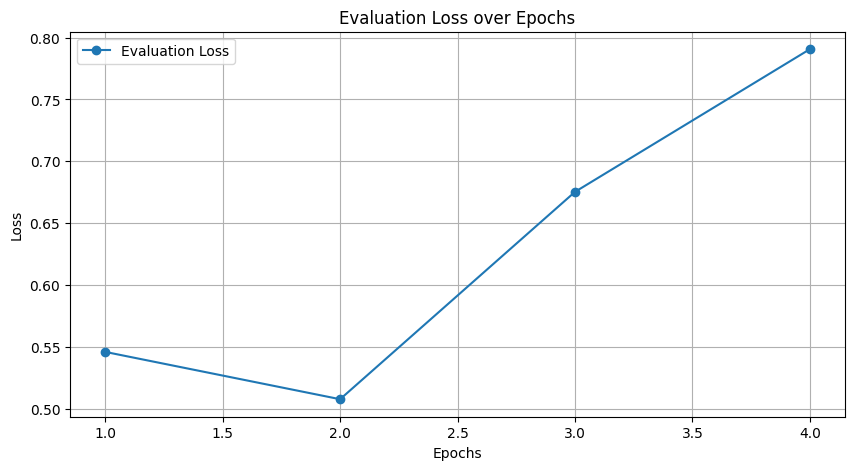

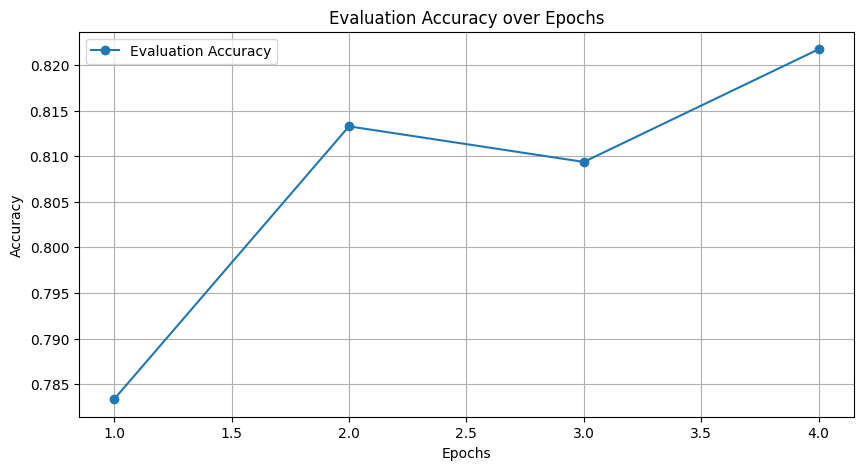

In [28]:
plot_evaluation_metrics(trainer)


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/66 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


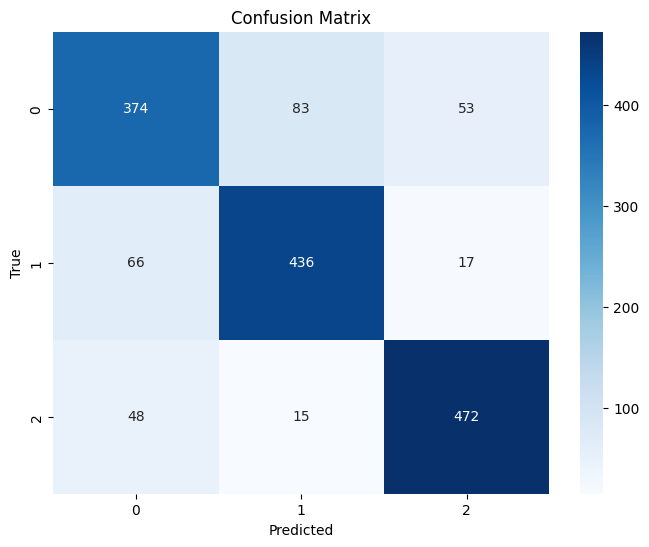

Accuracy: 0.8197
F1 Score: 0.8190


In [29]:
plot_test(trainer,test_set)

# Freezing layers

In [30]:
class ParsBert(BertForSequenceClassification):
    
    class_config = config

    def __init__(self, config):
        super(ParsBert, self).__init__(config)   
        self.bert = BertModel(config)

        # Freeze the first nine layers
        for param in self.bert.encoder.layer[:9].parameters():
            param.requires_grad = False

        self.dropout = nn.Dropout(0.3)   
        self.classifier = nn.Linear(config.hidden_size, 3)
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.bert(input_ids, attention_mask, token_type_ids, **kwargs).pooler_output
        outputs = self.dropout(outputs)
        logits = self.classifier(outputs)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels.view(-1))
            return SequenceClassifierOutput(  
                loss=loss,
                logits=logits
            )


In [31]:
trainer = Trainer(model_init=model_init, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=training_set,
                    eval_dataset=val_set,
                    tokenizer=tokenizer)

In [32]:
trainer.train()

  0%|          | 0/1212 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.8613, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6145633459091187, 'eval_accuracy': 0.7345478204294079, 'eval_runtime': 6.3711, 'eval_samples_per_second': 241.244, 'eval_steps_per_second': 10.202, 'epoch': 1.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.5173, 'learning_rate': 2.5e-05, 'epoch': 2.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5497987866401672, 'eval_accuracy': 0.7774886141834743, 'eval_runtime': 6.4914, 'eval_samples_per_second': 236.774, 'eval_steps_per_second': 10.013, 'epoch': 2.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.3337, 'learning_rate': 1.25e-05, 'epoch': 3.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5719701647758484, 'eval_accuracy': 0.7891997397527651, 'eval_runtime': 6.3584, 'eval_samples_per_second': 241.729, 'eval_steps_per_second': 10.223, 'epoch': 3.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.2303, 'learning_rate': 0.0, 'epoch': 4.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6317403316497803, 'eval_accuracy': 0.7872478854912166, 'eval_runtime': 6.3475, 'eval_samples_per_second': 242.144, 'eval_steps_per_second': 10.24, 'epoch': 4.0}
{'train_runtime': 419.3848, 'train_samples_per_second': 69.302, 'train_steps_per_second': 2.89, 'train_loss': 0.4856608173634746, 'epoch': 4.0}


TrainOutput(global_step=1212, training_loss=0.4856608173634746, metrics={'train_runtime': 419.3848, 'train_samples_per_second': 69.302, 'train_steps_per_second': 2.89, 'train_loss': 0.4856608173634746, 'epoch': 4.0})

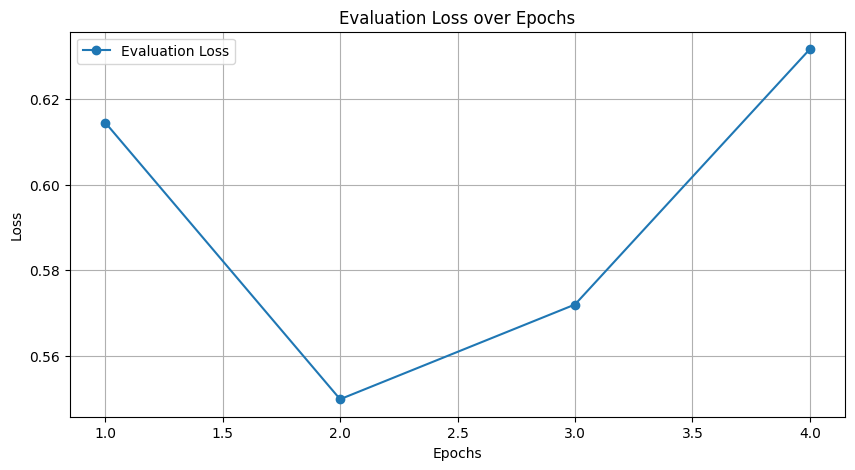

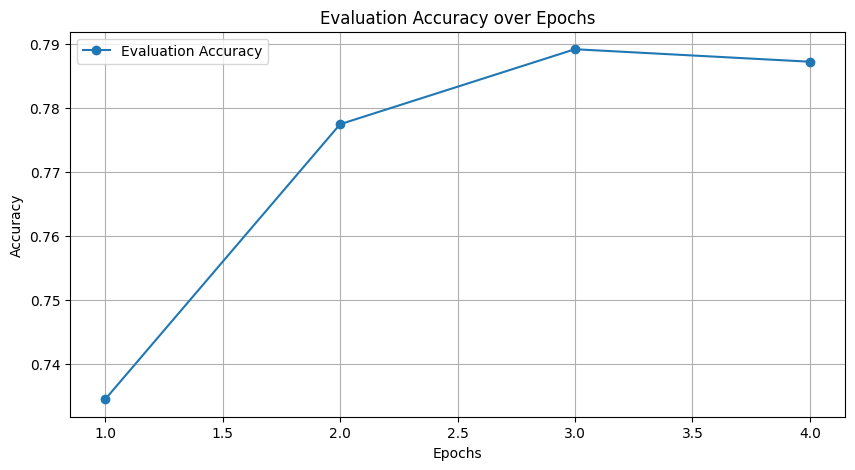

In [33]:
plot_evaluation_metrics(trainer)


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/66 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


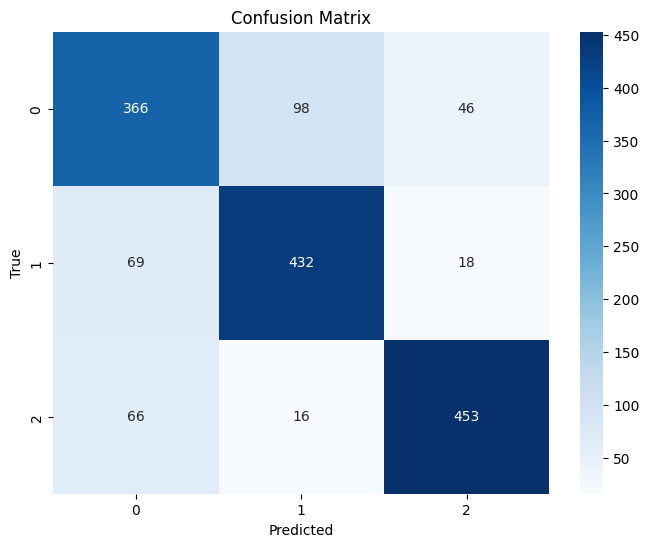

Accuracy: 0.7999
F1 Score: 0.7999


In [34]:
plot_test(trainer,test_set)

In [35]:
class ParsBert(BertForSequenceClassification):
    
    class_config = config

    def __init__(self, config):
        super(ParsBert, self).__init__(config)   
        self.bert = BertModel(config)

        for param in self.bert.encoder.layer[:].parameters():
            param.requires_grad = False

        self.dropout = nn.Dropout(0.3)   
        self.classifier = nn.Linear(config.hidden_size, 3)
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.bert(input_ids, attention_mask, token_type_ids, **kwargs).pooler_output
        outputs = self.dropout(outputs)
        logits = self.classifier(outputs)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels.view(-1))
            return SequenceClassifierOutput(  
                loss=loss,
                logits=logits
            )


In [36]:
trainer = Trainer(model_init=model_init, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=training_set,
                    eval_dataset=val_set,
                    tokenizer=tokenizer)

In [37]:
trainer.train()

  0%|          | 0/1212 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 1.0547, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.8980030417442322, 'eval_accuracy': 0.5972674040338322, 'eval_runtime': 6.3423, 'eval_samples_per_second': 242.341, 'eval_steps_per_second': 10.249, 'epoch': 1.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.8294, 'learning_rate': 2.5e-05, 'epoch': 2.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.7645732760429382, 'eval_accuracy': 0.6330513988288874, 'eval_runtime': 6.3692, 'eval_samples_per_second': 241.319, 'eval_steps_per_second': 10.205, 'epoch': 2.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.6641, 'learning_rate': 1.25e-05, 'epoch': 3.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.7430028319358826, 'eval_accuracy': 0.6402081977878985, 'eval_runtime': 6.3648, 'eval_samples_per_second': 241.485, 'eval_steps_per_second': 10.212, 'epoch': 3.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.5823, 'learning_rate': 0.0, 'epoch': 4.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.7395097613334656, 'eval_accuracy': 0.649316851008458, 'eval_runtime': 6.3578, 'eval_samples_per_second': 241.752, 'eval_steps_per_second': 10.224, 'epoch': 4.0}
{'train_runtime': 396.9249, 'train_samples_per_second': 73.223, 'train_steps_per_second': 3.053, 'train_loss': 0.7826323430530309, 'epoch': 4.0}


TrainOutput(global_step=1212, training_loss=0.7826323430530309, metrics={'train_runtime': 396.9249, 'train_samples_per_second': 73.223, 'train_steps_per_second': 3.053, 'train_loss': 0.7826323430530309, 'epoch': 4.0})

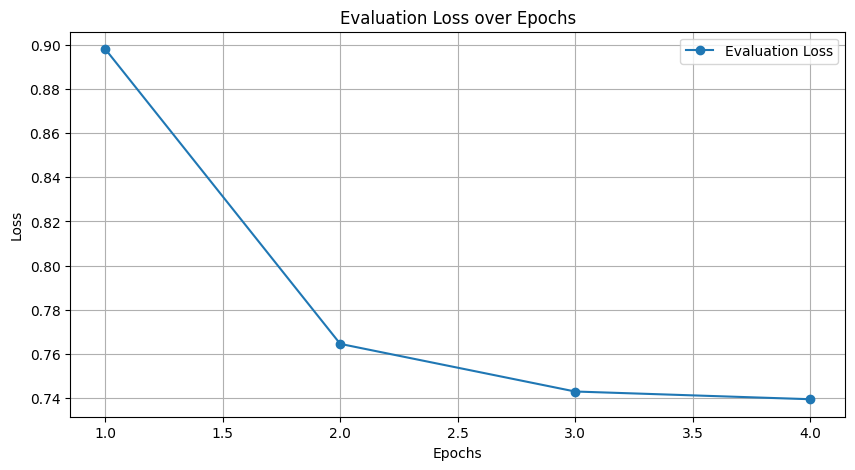

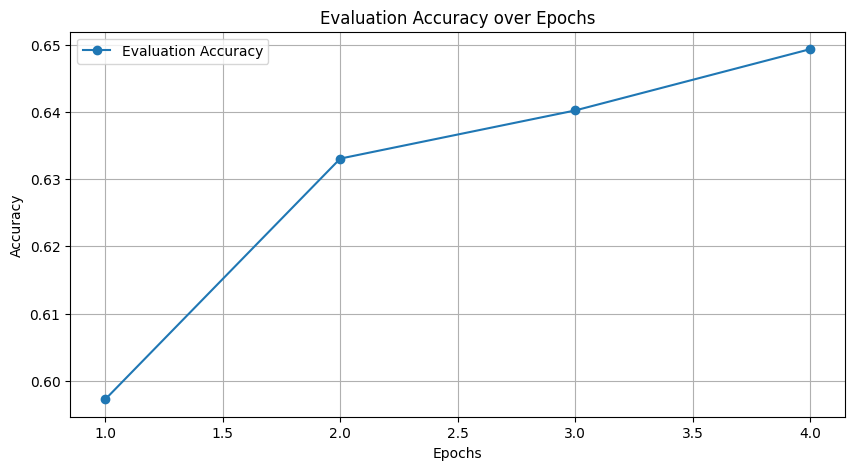

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/66 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


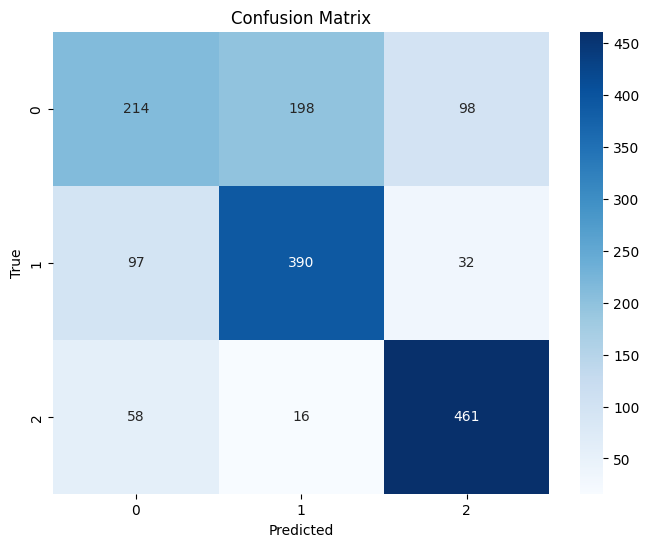

Accuracy: 0.6809
F1 Score: 0.6694


In [38]:
plot_evaluation_metrics(trainer)

plot_test(trainer,test_set)

In [50]:
class ParsBert(BertForSequenceClassification):
    
    class_config = config
    class_config.num_hidden_layers = 9
    def __init__(self, config):
        super(ParsBert, self).__init__(config)   
        self.bert = BertModel(config)

        self.dropout = nn.Dropout(0.3)   
        self.classifier = nn.Linear(config.hidden_size, 3)
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.bert(input_ids, attention_mask, token_type_ids, **kwargs).pooler_output
        outputs = self.dropout(outputs)
        logits = self.classifier(outputs)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels.view(-1))
            return SequenceClassifierOutput(  
                loss=loss,
                logits=logits
            )


In [51]:
ParsBert(config)

ParsBert(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-8): 9 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tr

In [40]:
trainer = Trainer(model_init=model_init, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=training_set,
                    eval_dataset=val_set,
                    tokenizer=tokenizer)

In [41]:
trainer.train()

  0%|          | 0/1212 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.8045, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5632462501525879, 'eval_accuracy': 0.7586206896551724, 'eval_runtime': 4.9101, 'eval_samples_per_second': 313.03, 'eval_steps_per_second': 13.238, 'epoch': 1.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.4275, 'learning_rate': 2.5e-05, 'epoch': 2.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.5522400140762329, 'eval_accuracy': 0.7839947950553026, 'eval_runtime': 4.9098, 'eval_samples_per_second': 313.05, 'eval_steps_per_second': 13.239, 'epoch': 2.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.2055, 'learning_rate': 1.25e-05, 'epoch': 3.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6754290461540222, 'eval_accuracy': 0.8002602472348731, 'eval_runtime': 4.9102, 'eval_samples_per_second': 313.02, 'eval_steps_per_second': 13.238, 'epoch': 3.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.0895, 'learning_rate': 0.0, 'epoch': 4.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.843792200088501, 'eval_accuracy': 0.8048145738451529, 'eval_runtime': 4.9121, 'eval_samples_per_second': 312.903, 'eval_steps_per_second': 13.233, 'epoch': 4.0}
{'train_runtime': 368.899, 'train_samples_per_second': 78.786, 'train_steps_per_second': 3.285, 'train_loss': 0.3817501430070833, 'epoch': 4.0}


TrainOutput(global_step=1212, training_loss=0.3817501430070833, metrics={'train_runtime': 368.899, 'train_samples_per_second': 78.786, 'train_steps_per_second': 3.285, 'train_loss': 0.3817501430070833, 'epoch': 4.0})

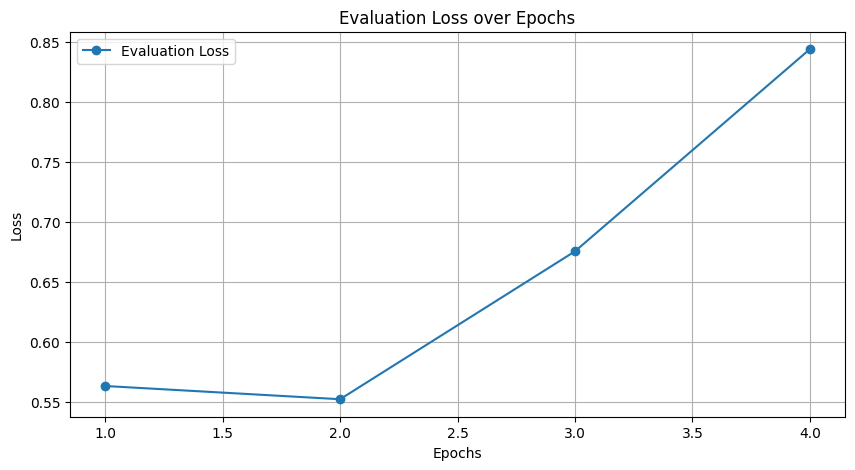

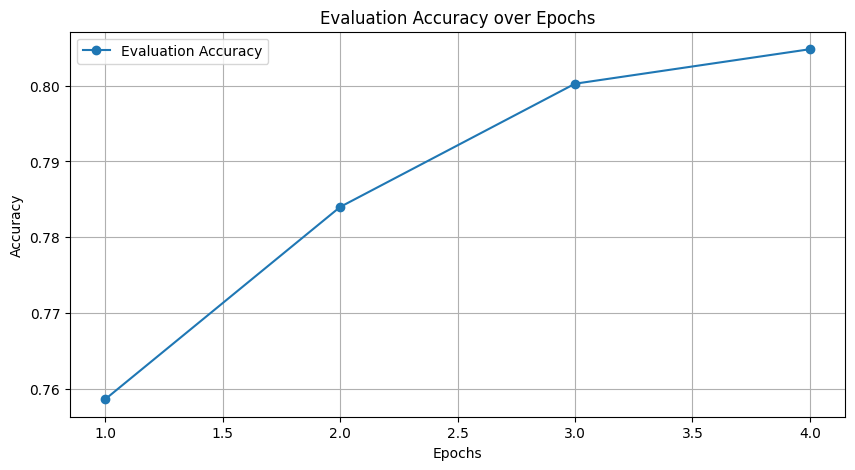

In [42]:
plot_evaluation_metrics(trainer)


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/66 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


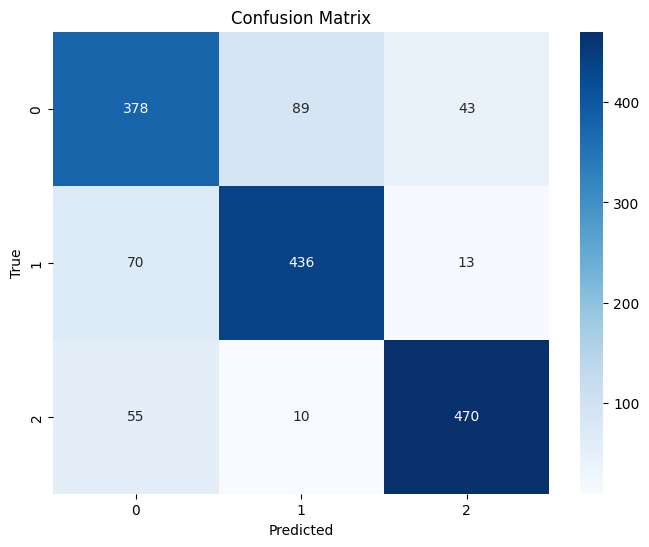

Accuracy: 0.8210
F1 Score: 0.8210


In [43]:
plot_test(trainer,test_set)

In [44]:
import random
from transformers import BertForSequenceClassification, BertConfig

class ParsBertPrunedHeads(BertForSequenceClassification):
    
    class_config = config

    def __init__(self, config):
        super(ParsBertPrunedHeads, self).__init__(config)   
        self.bert = BertModel(config)

        self.dropout = nn.Dropout(0.3)   
        self.classifier = nn.Linear(config.hidden_size, 3)
        self.init_weights()
        
    def forward(self, input_ids=None, attention_mask=None, token_type_ids=None, labels=None, **kwargs):
        outputs = self.bert(input_ids, attention_mask, token_type_ids, **kwargs).pooler_output
        outputs = self.dropout(outputs)
        logits = self.classifier(outputs)
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits, labels.view(-1))
            return SequenceClassifierOutput(  
                loss=loss,
                logits=logits
            )



In [45]:
def prune_heads_randomly( model, percent_to_prune=0.5):
        config = model.config
        heads_to_prune_per_layer = {
            layer: random.sample(range(config.num_attention_heads), int(config.num_attention_heads * percent_to_prune)) for layer in range(config.num_hidden_layers)
        }

        model.prune_heads(heads_to_prune_per_layer)

def model_init():
        model = ParsBert.from_pretrained("HooshvareLab/bert-base-parsbert-uncased", config=config).to(device)
        prune_heads_randomly(model,percent_to_prune=0.5)
        return model



In [46]:
trainer = Trainer(model_init=model_init, args=training_args,
                    compute_metrics=compute_metrics,
                    train_dataset=training_set,
                    eval_dataset=val_set,
                    tokenizer=tokenizer)

In [47]:
trainer.train()

  0%|          | 0/1212 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.8933, 'learning_rate': 3.7500000000000003e-05, 'epoch': 1.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6564067006111145, 'eval_accuracy': 0.7098243331164606, 'eval_runtime': 4.0381, 'eval_samples_per_second': 380.624, 'eval_steps_per_second': 16.097, 'epoch': 1.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.5185, 'learning_rate': 2.5e-05, 'epoch': 2.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6517937183380127, 'eval_accuracy': 0.7469095640858816, 'eval_runtime': 4.0346, 'eval_samples_per_second': 380.954, 'eval_steps_per_second': 16.111, 'epoch': 2.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.2813, 'learning_rate': 1.25e-05, 'epoch': 3.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.6767234802246094, 'eval_accuracy': 0.7690305790500976, 'eval_runtime': 4.0321, 'eval_samples_per_second': 381.188, 'eval_steps_per_second': 16.121, 'epoch': 3.0}


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
c:\Users\11\anaconda3\envs\torch\Lib\site-packages\torch\utils\checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.w

{'loss': 0.1444, 'learning_rate': 0.0, 'epoch': 4.0}


  0%|          | 0/65 [00:00<?, ?it/s]

{'eval_loss': 0.8208988904953003, 'eval_accuracy': 0.7794404684450228, 'eval_runtime': 4.0286, 'eval_samples_per_second': 381.522, 'eval_steps_per_second': 16.135, 'epoch': 4.0}
{'train_runtime': 298.749, 'train_samples_per_second': 97.286, 'train_steps_per_second': 4.057, 'train_loss': 0.4593830643707376, 'epoch': 4.0}


TrainOutput(global_step=1212, training_loss=0.4593830643707376, metrics={'train_runtime': 298.749, 'train_samples_per_second': 97.286, 'train_steps_per_second': 4.057, 'train_loss': 0.4593830643707376, 'epoch': 4.0})

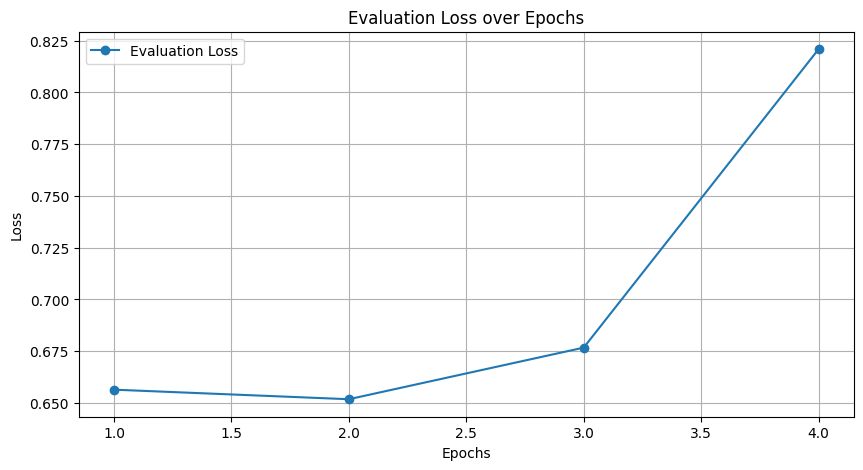

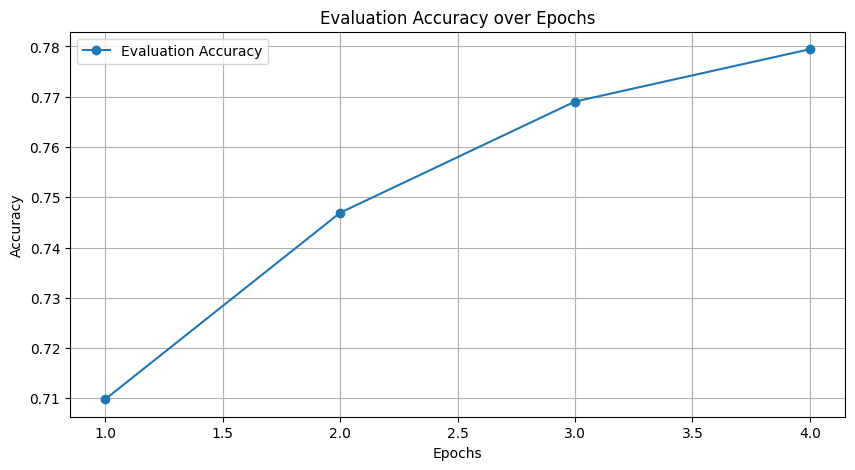

In [48]:
plot_evaluation_metrics(trainer)


c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


  0%|          | 0/66 [00:00<?, ?it/s]

c:\Users\11\anaconda3\envs\torch\Lib\site-packages\transformers\tokenization_utils_base.py:2618: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


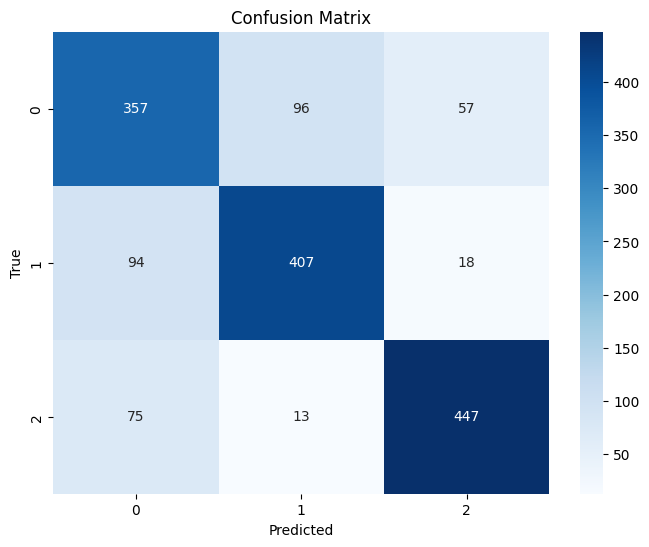

Accuracy: 0.7743
F1 Score: 0.7750


In [49]:
plot_test(trainer,test_set)